Nama : Putu Padmanaba

Email : naba17092004@gmail.com

Domisili : Denpasar, Bali

Beasiswa : IDcamp Indosat

#Data Collection

Dataset ini diambil dari: https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile

####Instal Package Kaggle

In [2]:
 ! pip install -q kaggle

####Upload Json Profile Kaggle

In [3]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putupadmanaba231","key":"a0c321c2e51112cd6571364aced73f93"}'}

####Membuat direktori dan mengatur izin agar bisa memasukan JSON Kaggle

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

####Mendownload Dataset

In [5]:
!kaggle datasets download -d adityakadiwal/water-potability

100% 251k/251k [00:00<00:00, 581kB/s]
100% 251k/251k [00:00<00:00, 581kB/s]


####Ekstrak Zipfile

In [6]:
local_zip = '/content/water-potability.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

####Memuat dataset ke dalam Pandas Dataframe

In [7]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#Data Understanding

####Mengecek informasi dari dataset

In [8]:
df.shape

(3276, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


####Mengecek missing value

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

####Mengecek statistik dari data

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


####Mengecek persebaran features

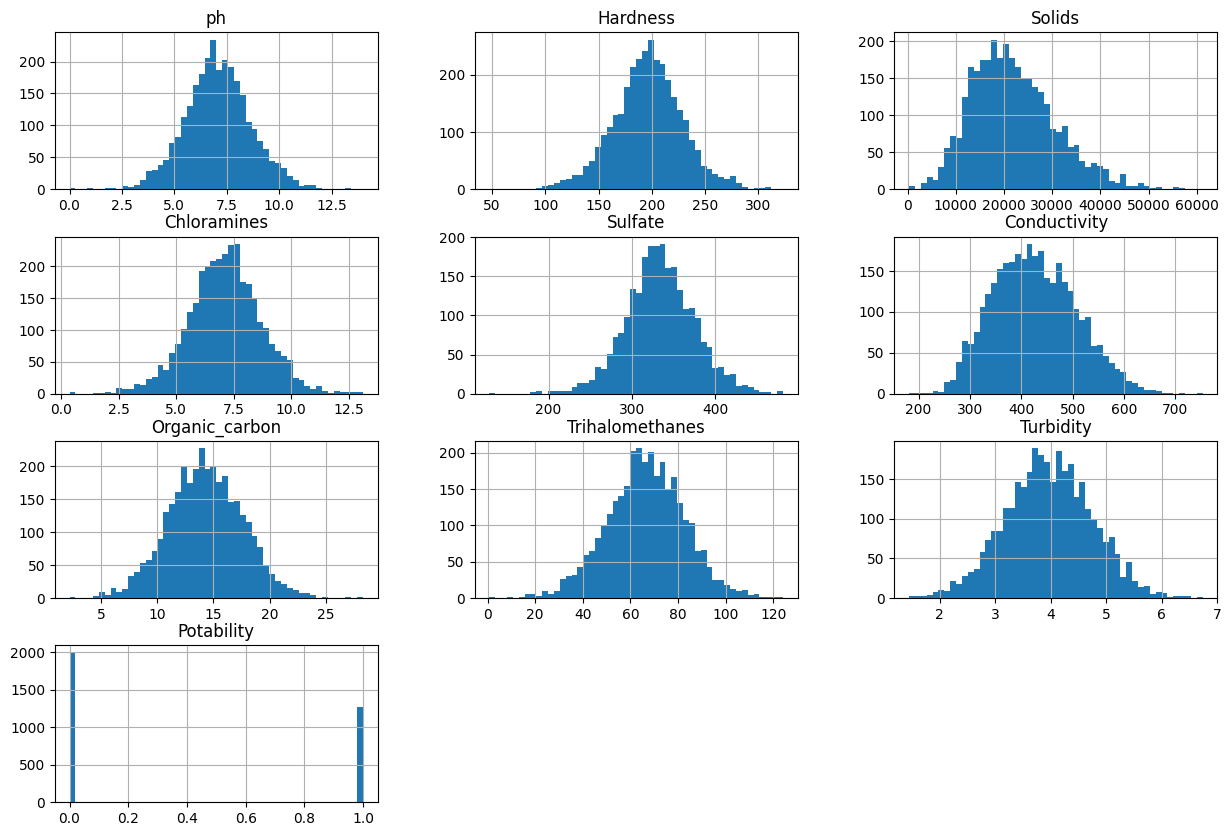

In [12]:
df.hist(bins=50, figsize=(15,10))
plt.show()

####Melihat korelasi antar features

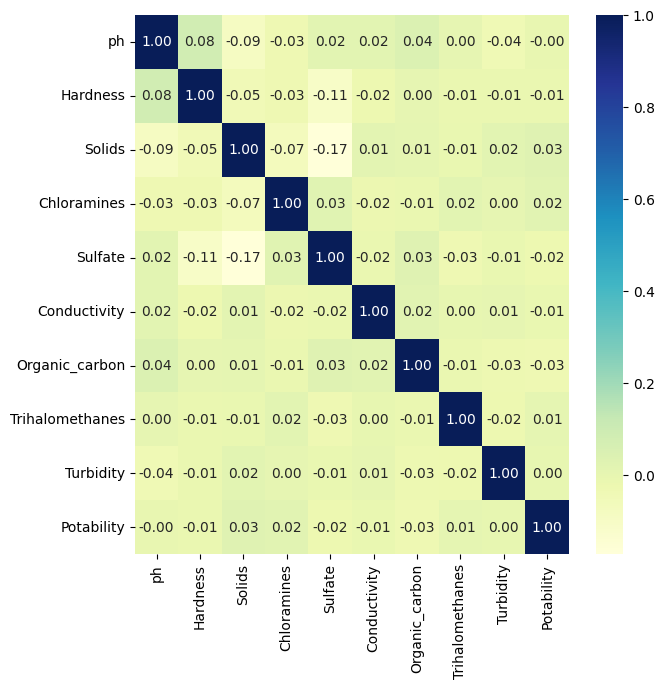

In [13]:
Corrmat = df.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="YlGnBu", annot=True, fmt='.2f')
plt.show()

#Data preparation

####Menangani missing value

In [14]:
phMean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = phMean_0
phMean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = phMean_1

SulfateMean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [15]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

####Mengecek distribusi data berdasarkan kolom "Potability"

Text(0.5, 1.0, 'Safe drinking water ratio ')

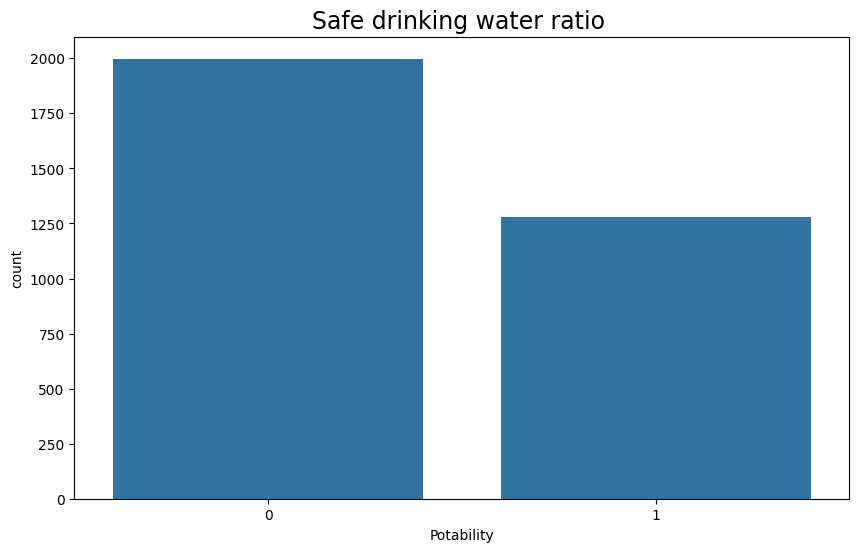

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(df,x="Potability")
plt.title("Safe drinking water ratio ", size =17)

####Membagi dataset menjadi training set dan test set

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['Potability'],axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=1)

#mengecek jumlah dataset
print(X_train.shape)
print(X_test.shape)

(2457, 9)
(819, 9)


####Balancing data menggunakan SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Balancing the data menggunakan SMOTE\n')
smt = SMOTE()
counter = Counter(y_train)
print('Before SMOTE', counter)
X_train, y_train = smt.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('\nAfter SMOTE', counter)

Balancing the data menggunakan SMOTE

Before SMOTE Counter({0: 1523, 1: 934})

After SMOTE Counter({0: 1523, 1: 1523})


####Standarisasi

In [20]:
from sklearn.preprocessing import StandardScaler

features = ['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'	]
scaler = StandardScaler()
scaler.fit(X_train.loc[:, features])
X_train_scaled = scaler.transform(X_train.loc[:, features])
X_train.loc[:, features] = X_train_scaled
X_train.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.576745,-0.219423,1.328835,0.644850,0.226803,1.217655,0.053329,-1.282099,0.579167
1,-0.070250,-0.788267,-0.290691,-1.388173,0.913607,0.000104,0.943972,-1.161657,0.682520
2,-0.001660,0.335639,0.869589,0.239620,0.032595,0.057750,2.009358,1.041662,-0.089874
3,0.589610,0.297540,-1.052042,0.368812,-0.064795,0.302691,0.429373,-0.732895,0.761020
4,-2.255140,-1.977505,-0.271807,0.392448,-0.784746,0.388707,0.803217,0.984424,0.437041


In [21]:
X_train.describe().round(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3046.000,3046.000,3046.000,3046.000,3046.000,3046.000,3046.000,3046.000,3046.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-4.944,-4.583,-2.454,-4.425,-4.096,-2.823,-3.784,-4.327,-3.338
25%,-0.538,-0.611,-0.734,-0.628,-0.454,-0.755,-0.646,-0.601,-0.667
50%,-0.002,0.023,-0.108,-0.009,0.033,-0.062,-0.014,-0.012,-0.015
75%,0.529,0.630,0.614,0.636,0.487,0.684,0.695,0.652,0.681
max,4.821,3.971,4.426,3.750,4.009,4.129,4.380,3.777,3.691


#Modeling

####Normalisasi dataset test

In [22]:
from sklearn.preprocessing import StandardScaler

features = ['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'	]
scaler = StandardScaler()
scaler.fit(X_test.loc[:, features])
X_test_scaled = scaler.transform(X_test.loc[:, features])
X_test.loc[:, features] = X_test_scaled
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
136,-0.719453,-1.175718,-0.872391,0.227670,-0.754124,-1.257488,-0.597359,0.171282,-0.647285
600,0.021112,1.026589,0.543310,-0.551466,-0.965113,-0.876374,0.771844,-0.917690,0.386854
1784,1.591679,-0.954019,3.215387,-0.746305,2.243468,-0.328836,-0.707622,-0.244676,-0.858215
3061,-2.222519,0.510126,2.052053,0.229718,-0.645504,-0.341047,-0.941900,1.270371,0.544384
2779,1.737515,0.776557,-0.111943,-1.053085,-2.891468,0.074750,0.465883,-0.871722,0.100659


####Liblary untuk metrix evaluasi model

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

####Dataframe untuk analisis akurasi model

In [24]:
models = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'],
                      columns=['KNN', 'SVM', 'Randomforest'])

####KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

####SVC

In [26]:
from sklearn.svm import SVC

svc = SVC(C=20)
svc.fit(X_train,y_train)

SVC(C=20)

####Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=110,max_depth=16, random_state=123, n_jobs=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, n_estimators=110, n_jobs=1,
                       random_state=123)

#Evaluasi model

####Menghitung matrix evaluasi model

In [28]:
# KNN
models.loc['accuracy', 'KNN'] = accuracy_score(y_pred=knn.predict(X_test),y_true=y_test)
models.loc['recall', 'KNN'] = recall_score(y_pred=knn.predict(X_test),y_true=y_test)
models.loc['precision', 'KNN'] = precision_score(y_pred=knn.predict(X_test),y_true=y_test)
models.loc['f1_score', 'KNN'] = f1_score(y_pred=knn.predict(X_test),y_true=y_test)
# SVC
models.loc['accuracy', 'SVM'] = accuracy_score(y_pred=svc.predict(X_test),y_true=y_test)
models.loc['recall', 'SVM'] = recall_score(y_pred=svc.predict(X_test),y_true=y_test)
models.loc['precision', 'SVM'] = precision_score(y_pred=svc.predict(X_test),y_true=y_test)
models.loc['f1_score', 'SVM'] = f1_score(y_pred=svc.predict(X_test),y_true=y_test)
# RandomForest
models.loc['accuracy', 'Randomforest'] = accuracy_score(y_pred=rf.predict(X_test),y_true=y_test)
models.loc['recall', 'Randomforest'] = recall_score(y_pred=rf.predict(X_test),y_true=y_test)
models.loc['precision', 'Randomforest'] = precision_score(y_pred=rf.predict(X_test),y_true=y_test)
models.loc['f1_score', 'Randomforest'] = f1_score(y_pred=rf.predict(X_test),y_true=y_test)

####Menanpilkan hasil evaluasi model

In [29]:
models

,KNN,SVM,Randomforest
accuracy,0.595849,0.622711,0.732601
precision,0.515294,0.544529,0.6703
recall,0.636628,0.622093,0.715116
f1_score,0.569571,0.580733,0.691983
